# Convolutional Neural Networks with 17flowers

A simple deep learning example on how to start classifying images with your own data.
This notebook is expected to be executed after 17flowers_data.ipynb (for data creation).

## Setup

After preparing necessary environment, please make sure to have these files where you execute this notebook.
https://github.com/roebius/deeplearning1_keras2/tree/master/nbs
- utils.py
- vgg16.py

In [1]:
from __future__ import division, print_function

%matplotlib inline

In [2]:
path = "data/17flowers/"

In [3]:
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
# check that ~/.keras/keras.json is set for Theano and includes "image_data_format": "channels_first"
from importlib import reload  # Python 3
import utils; reload(utils)
from utils import plots

Using Theano backend.


## Use a pretrained VGG model with our Vgg16 class

In [5]:
# As large as you can, but no larger than 64 is recommended.
batch_size = 8
#batch_size = 64

In [6]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

The original pre-trained Vgg16 class classifies images into one of the 1000 categories. This number of categories depends on the dataset which Vgg16 was trained with. (http://image-net.org/challenges/LSVRC/2014/browse-synsets)

In order to classify images into the categories which we prepare (17 categories of flowers, in this notebook), *fine-tuning* technology is useful. It:
- keeps the most weights from the pre-trained Vgg16 model, but modifies only a few parts of the weights
- changes the dimension of the output layer (from 1000 to 17, in this notebook) 

In [7]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

# please note that the vgg model is compiled inside the finetune method.
vgg.finetune(batches)
vgg.fit(batches, val_batches, batch_size, nb_epoch=1)

Found 1020 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


Epoch 1/1
128/128 [==============================] - 670s - loss: 2.0221 - acc: 0.5420 - val_loss: 0.6882 - val_acc: 0.7765


## Use Vgg16 for basic image recognition

Let's grab batches of data from our test folder:

In [8]:
batches = vgg.get_batches(path+'test', batch_size=5)

Found 170 images belonging to 17 classes.


In [9]:
imgs,labels = next(batches)
print(labels)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


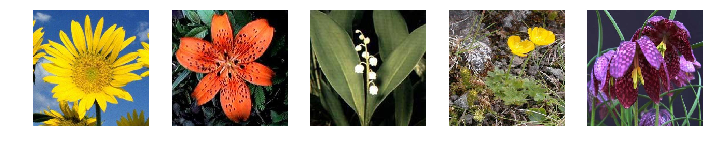

In [10]:
#plots(imgs, titles=labels)
plots(imgs)

With finetuning, the model vgg outputs the probability of 17 classes. As you can see below, they are generally relevant to the input images. 

Note that these images are not used during model training.

In [11]:
vgg.predict(imgs, True)

(array([ 0.9955,  0.4238,  0.9892,  0.7996,  0.5073], dtype=float32),
 array([13, 14, 10,  5, 14]),
 ['Sunflower', 'Tigerlily', 'LilyValley', 'Daffodil', 'Tigerlily'])

In [12]:
vgg.classes[:20]

['Bluebell',
 'Buttercup',
 'ColtsFoot',
 'Cowslip',
 'Crocus',
 'Daffodil',
 'Daisy',
 'Dandelion',
 'Fritillary',
 'Iris',
 'LilyValley',
 'Pansy',
 'Snowdrop',
 'Sunflower',
 'Tigerlily',
 'Tulip',
 'Windflower']

## Without finetune?

In [13]:
# make new Vgg16 instance
vgg2 = Vgg16()

# need to compile the model before using
vgg2.compile()

Again get some images for prediction

In [14]:
batches = vgg2.get_batches(path+'test', batch_size=5)

Found 170 images belonging to 17 classes.


In [15]:
imgs,labels = next(batches)
print(labels)

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


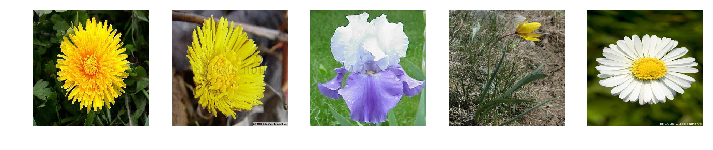

In [16]:
plots(imgs)

Without finetuning, the model vgg2 outputs the probability of 1000 classes. As you can see below, they are sometimes totally irrelevant.

In [17]:
vgg2.predict(imgs, True)

(array([ 0.285 ,  0.554 ,  0.3269,  0.2035,  0.9994], dtype=float32),
 array([985, 991, 309,  11, 985]),
 ['daisy', 'coral_fungus', 'bee', 'goldfinch', 'daisy'])

In [18]:
vgg2.classes[:20]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house_finch',
 'junco',
 'indigo_bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee']